# Import librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.animation as animation
from PIL import Image
import glob

# Define function

In [2]:
def cleanGrdFiles_ww3(nparray_var2d, nparray_rst, def_v, convFac_ww3):
    listBadRow=[]
    listBadCol=[]
    for col_i in range(len(nparray_var2d[0])):
        col=nparray_var2d[:,col_i]
        if (np.count_nonzero(col == def_v) == len(col)):
            listBadCol.append(col_i)
    for row_i in range(len(nparray_var2d[:,0])):
        row=nparray_var2d[row_i]
        if (np.count_nonzero(row == def_v) == len(row)):
            listBadRow.append(row_i)
            
    nparray_var2d[listBadRow]=nparray_rst[listBadRow]/convFac_ww3
    nparray_var2d[:,listBadCol]=nparray_rst[:,listBadCol]/convFac_ww3
    
    return nparray_var2d

def plot_waveIce(repI, repO, repRst, expN, ts, listV, xG, yG, defV, convF):
    orig_map=plt.cm.get_cmap('Spectral')
    reversed_map = orig_map.reversed()
    #cbar_min=0
    #cbar_max=300
    #cbarlabels = np.linspace(np.floor(cbar_min), np.ceil(cbar_max), num=5, endpoint=True)
    
    #Read wave field
    file_hs=repI+"/ww3."+ts+".hs"
    hs_2d=np.genfromtxt(file_hs, dtype=None, skip_header=1)
    hs_rst=np.zeros((len(xG), len(yG)))
    hs_2d=cleanGrdFiles_ww3(hs_2d, hs_rst, defV, convF)
    
    X,Y = np.meshgrid(xG,yG)
    fig, ax = plt.subplots(3,1,figsize=[8,12])
    i=0
    
    for v in listV:
        file_rst=repRst+"/"+v+"_"+expN+".txt"
        var_rst=np.genfromtxt(file_rst, dtype=None)
        file_var = repI+"/ww3."+ts+"."+v
        var_2d=np.genfromtxt(file_var, dtype=None, skip_header=1)
        var_2d=cleanGrdFiles_ww3(var_2d, var_rst, defV, convF)
        ax[i].set_xlim([0, 3])
        ax[i].set_ylim([0.5, 2.5])
        ax[i].tick_params(labelsize=14)
        ax[i].set_yticks(np.arange(0.5, 3, 0.5))
        ax[i].set_xlabel('Longitude [$^\circ$]', size=16)
        ax[i].set_ylabel('Latitude [$^\circ$]', size=16)
        cont=ax[i].contour(X,Y, hs_2d*convF, colors='black', levels=[0.01, 0.02, 0.04, 0.06, 0.1, 0.14, 0.2])
        color=ax[i].contourf(X,Y,var_2d*convF, 50, cmap=reversed_map)
        ax[i].clabel(cont, fontsize= 12)
        cb=fig.colorbar(color, ax=ax[i])
        cb.ax.tick_params(labelsize=14)
        
        if i == 0:
            cb.set_label('Ice Concentration', size=16)
        if i == 1:
            cb.set_label('Ice Thickess [m]', size=16)
        if i == 2:
            cb.set_label('Mean Floe Diameter [m]', size=16)
        i=i+1
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.97)
    fig.savefig(repO+'/'+ts+'_'+expN, bbbox_to_anchor='tight', dpi=500)
    print("------------"+repO+'/'+ts+'_'+expN+" as been plotted---------------------")

def animate(rep_img, exp_name, start, end):
    # Create the frames
    frames = []
    list_imgs = glob.glob(rep_img+'/*.png')
    list.sort(list_imgs)
    for i in list_imgs:
        new_frame = Image.open(i)
        frames.append(new_frame)
 
    # Save into a GIF file that loops forever
    frames[0].save(rep_img+'/'+start+"_"+end+"_"+exp_name+'.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=3000, loop=0)

# Main : Plot at each time step and animate

/tmp/ipykernel_38458/1712960696.py:63: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_to_anchor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(repO+'/'+ts+'_'+expN, bbbox_to_anchor='tight', dpi=500)


------------/aos/home/bward/WW3/model/out/test6/img/10060600_test6 as been plotted---------------------
------------/aos/home/bward/WW3/model/out/test6/img/10060601_test6 as been plotted---------------------
------------/aos/home/bward/WW3/model/out/test6/img/10060602_test6 as been plotted---------------------
------------/aos/home/bward/WW3/model/out/test6/img/10060603_test6 as been plotted---------------------
------------/aos/home/bward/WW3/model/out/test6/img/10060604_test6 as been plotted---------------------
------------/aos/home/bward/WW3/model/out/test6/img/10060605_test6 as been plotted---------------------
------------/aos/home/bward/WW3/model/out/test6/img/10060606_test6 as been plotted---------------------


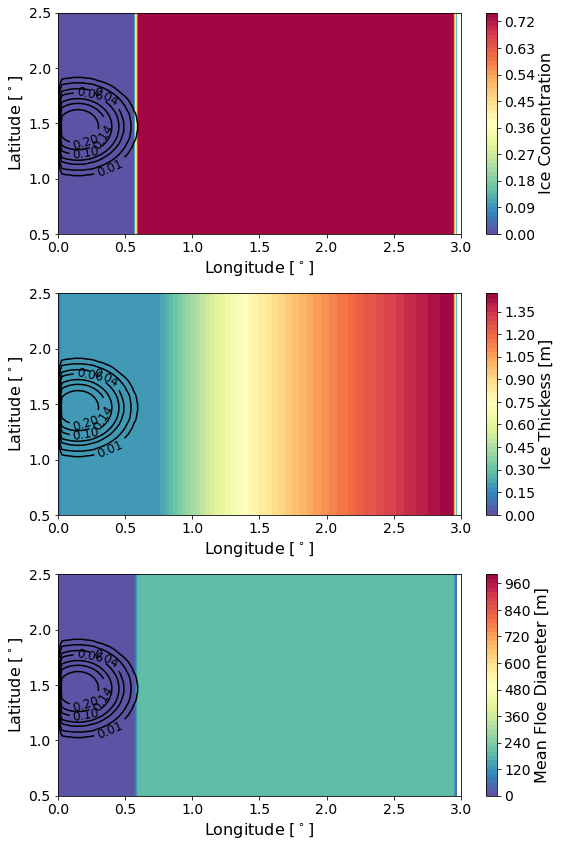

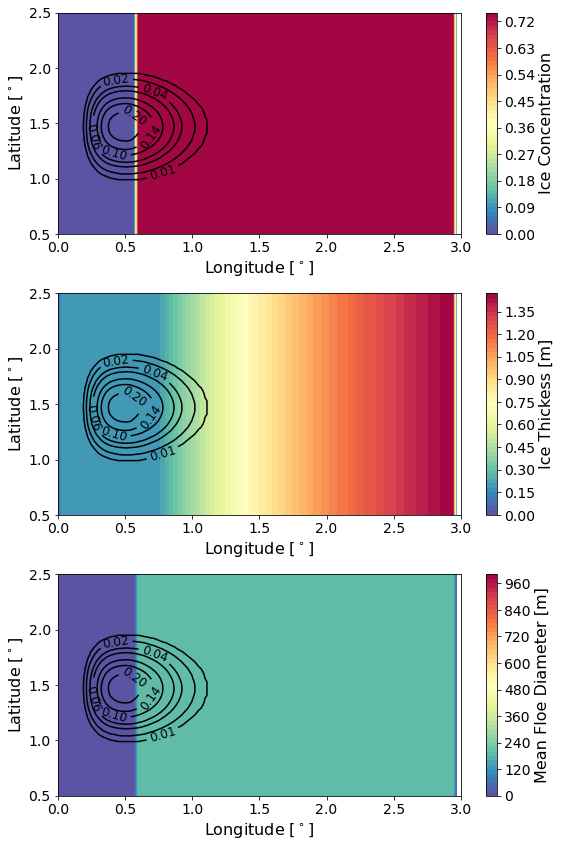

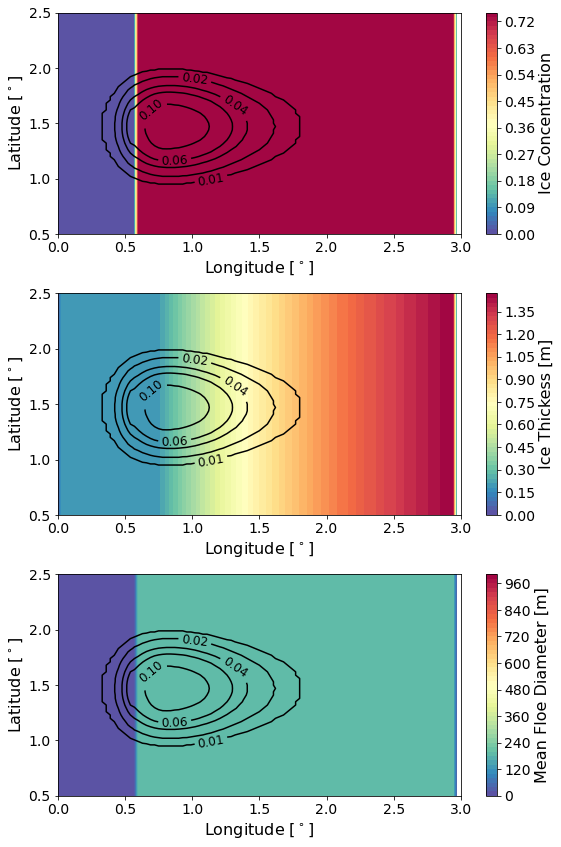

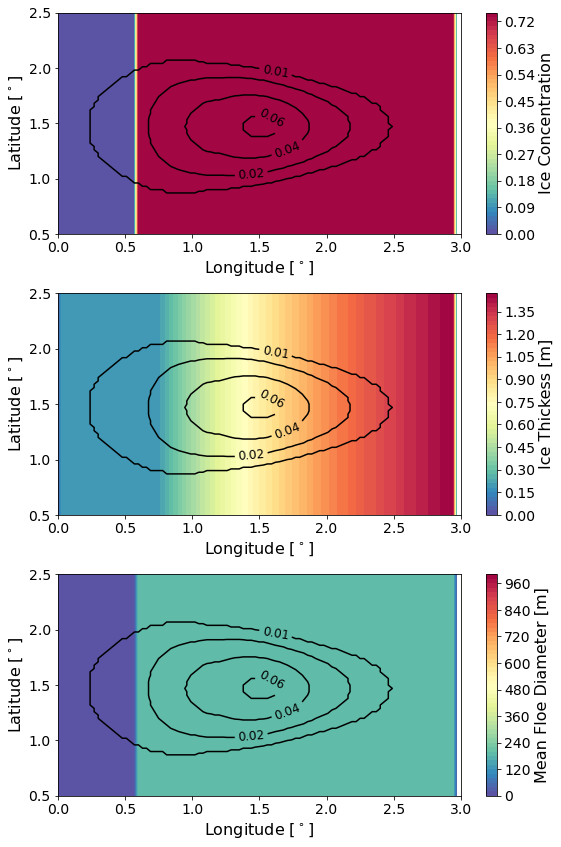

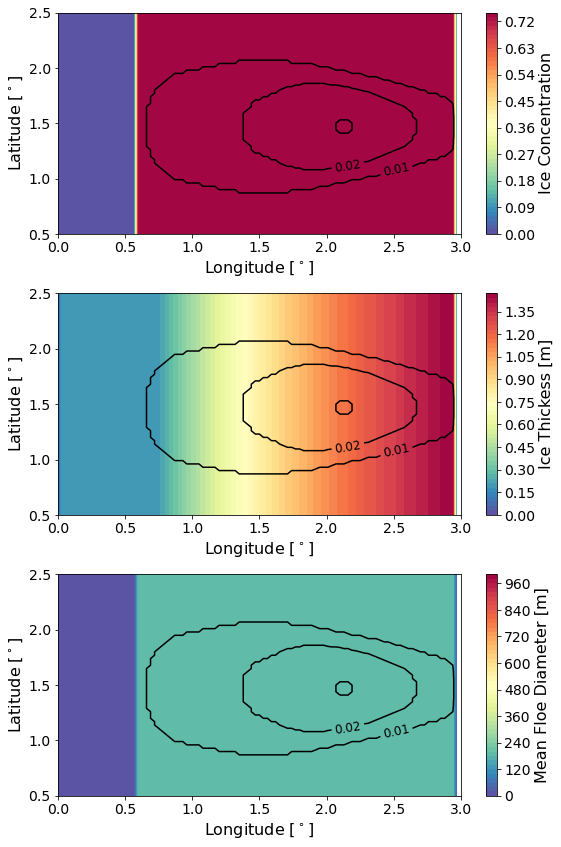

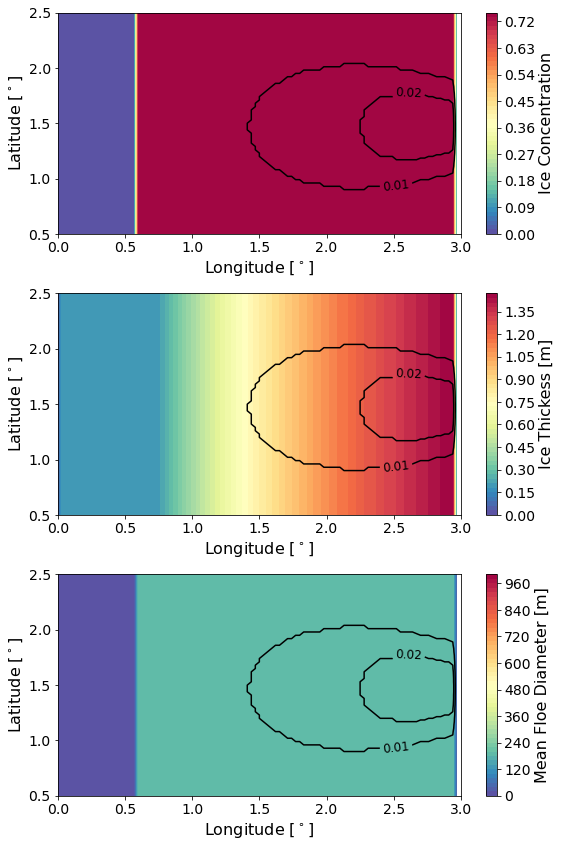

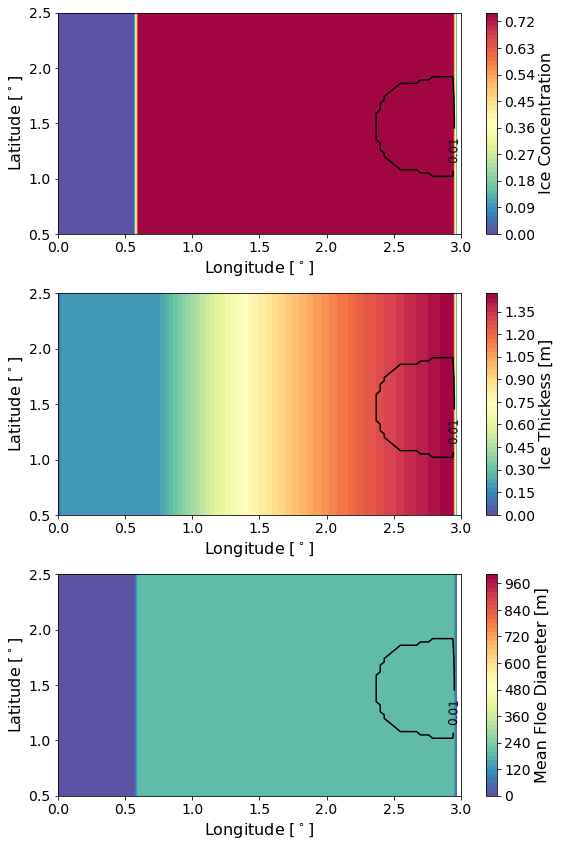

In [3]:
def main():
    #Define variables
    exp="test6"
    list_var=['ice', 'ic1', 'ic5'] #,'ic1','ic5'] #Ice concentration, Ice thickness, Mean floe size diameter
    list_ts=["10060600", "10060601", "10060602", "10060603", "10060604", "10060605", "10060606"]

    REP_IN='/aos/home/bward/WW3/model/inp/'+exp
    REP_OUT='/aos/home/bward/WW3/model/out/'+exp
    REP_OUT_GRD=REP_OUT+"/grd"
    REP_PP=REP_OUT+"/img"
    
    grdRes=0.03
    grdMax=3
    grdMin=0
    defValue=-999
    txt2ww3=0.001
    
    xgrid=np.arange(grdMin, grdMax, grdRes)
    ygrid=np.arange(grdMin, grdMax, grdRes)
                   
    #Plot at each timestep
    for ts in list_ts:
        plot_waveIce(REP_OUT_GRD, REP_PP, REP_IN, exp, ts, list_var, xgrid, ygrid, defValue, txt2ww3)
        #fig, ax = plt.subplots(3,1,figsize=[8,12])
        #ani=animation.FuncAnimation(fig, plot_waveIce, list_ts)
    #Animate
    animate(REP_PP, exp, list_ts[0], list_ts[len(list_ts)-1])

#Call main
if __name__ == "__main__":
    main()